<a href="https://colab.research.google.com/github/EmaJuarezDev/CD-1C2025/blob/main/EXCEL_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/TP_Virus_Alumnos.csv'

# Cargar el archivo CSV en un DataFrame de pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    dff = pd.read_csv(file_path)
    print("Archivo CSV cargado exitosamente.")
    print(df.head()) # Muestra las primeras filas del DataFrame
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo CSV cargado exitosamente.
   Edad     Genero        Peso     Laboral  hijos     BLD01      REC1  \
0   9.0   Femenino   36.410602    Inactivo      0  3.139714  6.929112   
1  58.0  Masculino  115.507184    Inactivo      4  2.953914  4.660136   
2  74.0  Masculino   81.249035      Activo      3  1.365200  3.005861   
3   NaN  Masculino   77.985589  No_declara      0  2.329285  4.344642   
4   1.0   Femenino   13.446208    Inactivo      0 -0.062975  3.938741   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.7292

In [ ]:
df.head(5)

Edad     Genero        Peso     Laboral  hijos     BLD01      REC1  \
0   9.0   Femenino   36.410602    Inactivo      0  3.139714  6.929112   
1  58.0  Masculino  115.507184    Inactivo      4  2.953914  4.660136   
2  74.0  Masculino   81.249035      Activo      3  1.365200  3.005861   
3   NaN  Masculino   77.985589  No_declara      0  2.329285  4.344642   
4   1.0   Femenino   13.446208    Inactivo      0 -0.062975  3.938741   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   

              LVL  target  
0       51.411632       0  
1  1000000.000000       0  
2  1000000.000000       1  
3             NaN       0  
4       21.627303       1

In [ ]:
df.dtypes

Edad       float64
Genero      object
Peso       float64
Laboral     object
hijos        int64
BLD01      float64
REC1       float64
REC2       float64
REC3       float64
REC4       float64
REC5       float64
BLD02      float64
BLD03      float64
LVL        float64
target       int64
dtype: object

In [ ]:
print((df.isnull().sum()/len(df)*100).sort_values(ascending=False))


Genero     40.047619
Edad       19.571429
LVL        12.547619
Laboral     0.000000
hijos       0.000000
BLD01       0.000000
Peso        0.000000
REC1        0.000000
REC2        0.000000
REC4        0.000000
REC3        0.000000
REC5        0.000000
BLD02       0.000000
BLD03       0.000000
target      0.000000
dtype: float64


In [ ]:

# Describe numeric columns
print("Descriptive statistics for numeric columns:")
print(df.describe())

print("\nUnique values and counts for categorical columns:")
# Iterate through columns to identify categorical ones
for col in df.columns:
  if df[col].dtype == 'object':  # Assuming object dtype for categorical columns
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Descriptive statistics for numeric columns:
              Edad         Peso        hijos        BLD01         REC1  \
count  3378.000000  4200.000000  4200.000000  4200.000000  4200.000000   
mean     38.658082    74.011575     1.817619     1.490120     4.016418   
std      25.048819    25.792979     1.684604     1.161904     0.998691   
min       0.000000     8.934178     0.000000    -2.994895     0.205533   
25%      15.000000    59.380536     0.000000     0.737673     3.327644   
50%      38.000000    81.736000     2.000000     1.483044     4.011945   
75%      63.000000    92.850926     3.000000     2.234045     4.693314   
max      79.000000   128.850297     5.000000     5.684675     7.512915   

              REC2         REC3         REC4         REC5        BLD02  \
count  4200.000000  4200.000000  4200.000000  4200.000000  4200.000000   
mean     64.022288    73.014364    15.016203    90.002233     1.341927   
std       1.001091     1.033638     1.038452     1.016661     1.013

In [ ]:

# Imputar nulos en la columna 'genero' con "no_declara"
df['Genero'] = df['Genero'].fillna("no_declara")

# Realizar One-Hot Encoding para las columnas 'genero' y 'laboral'
df = pd.get_dummies(df, columns=['Genero', 'Laboral'], dummy_na=False)

# Mostrar las primeras filas del DataFrame modificado para verificar los cambios
print("\nDataFrame después de imputación y One-Hot Encoding:")
print(df.head())




DataFrame después de imputación y One-Hot Encoding:
   Edad        Peso  hijos     BLD01      REC1       REC2       REC3  \
0   9.0   36.410602      0  3.139714  6.929112  63.712640  73.880613   
1  58.0  115.507184      4  2.953914  4.660136  64.582610  73.669319   
2  74.0   81.249035      3  1.365200  3.005861  63.613454  75.103984   
3   NaN   77.985589      0  2.329285  4.344642  64.433115  73.402436   
4   1.0   13.446208      0 -0.062975  3.938741  65.122602  75.007982   

        REC4       REC5     BLD02     BLD03             LVL  target  \
0  15.087239  90.400193  2.015331  1.633836       51.411632       0   
1  14.503106  90.817947  0.973317 -0.439358  1000000.000000       0   
2  14.077988  91.741638  3.243344  0.380413  1000000.000000       1   
3  15.583846  91.741709  3.188290 -0.226046             NaN       0   
4  16.961593  90.668625  2.729202  0.589698       21.627303       1   

   Genero_Femenino  Genero_Masculino  Genero_Otro  Genero_no_declara  \
0             T

KeyError: 'Genero'

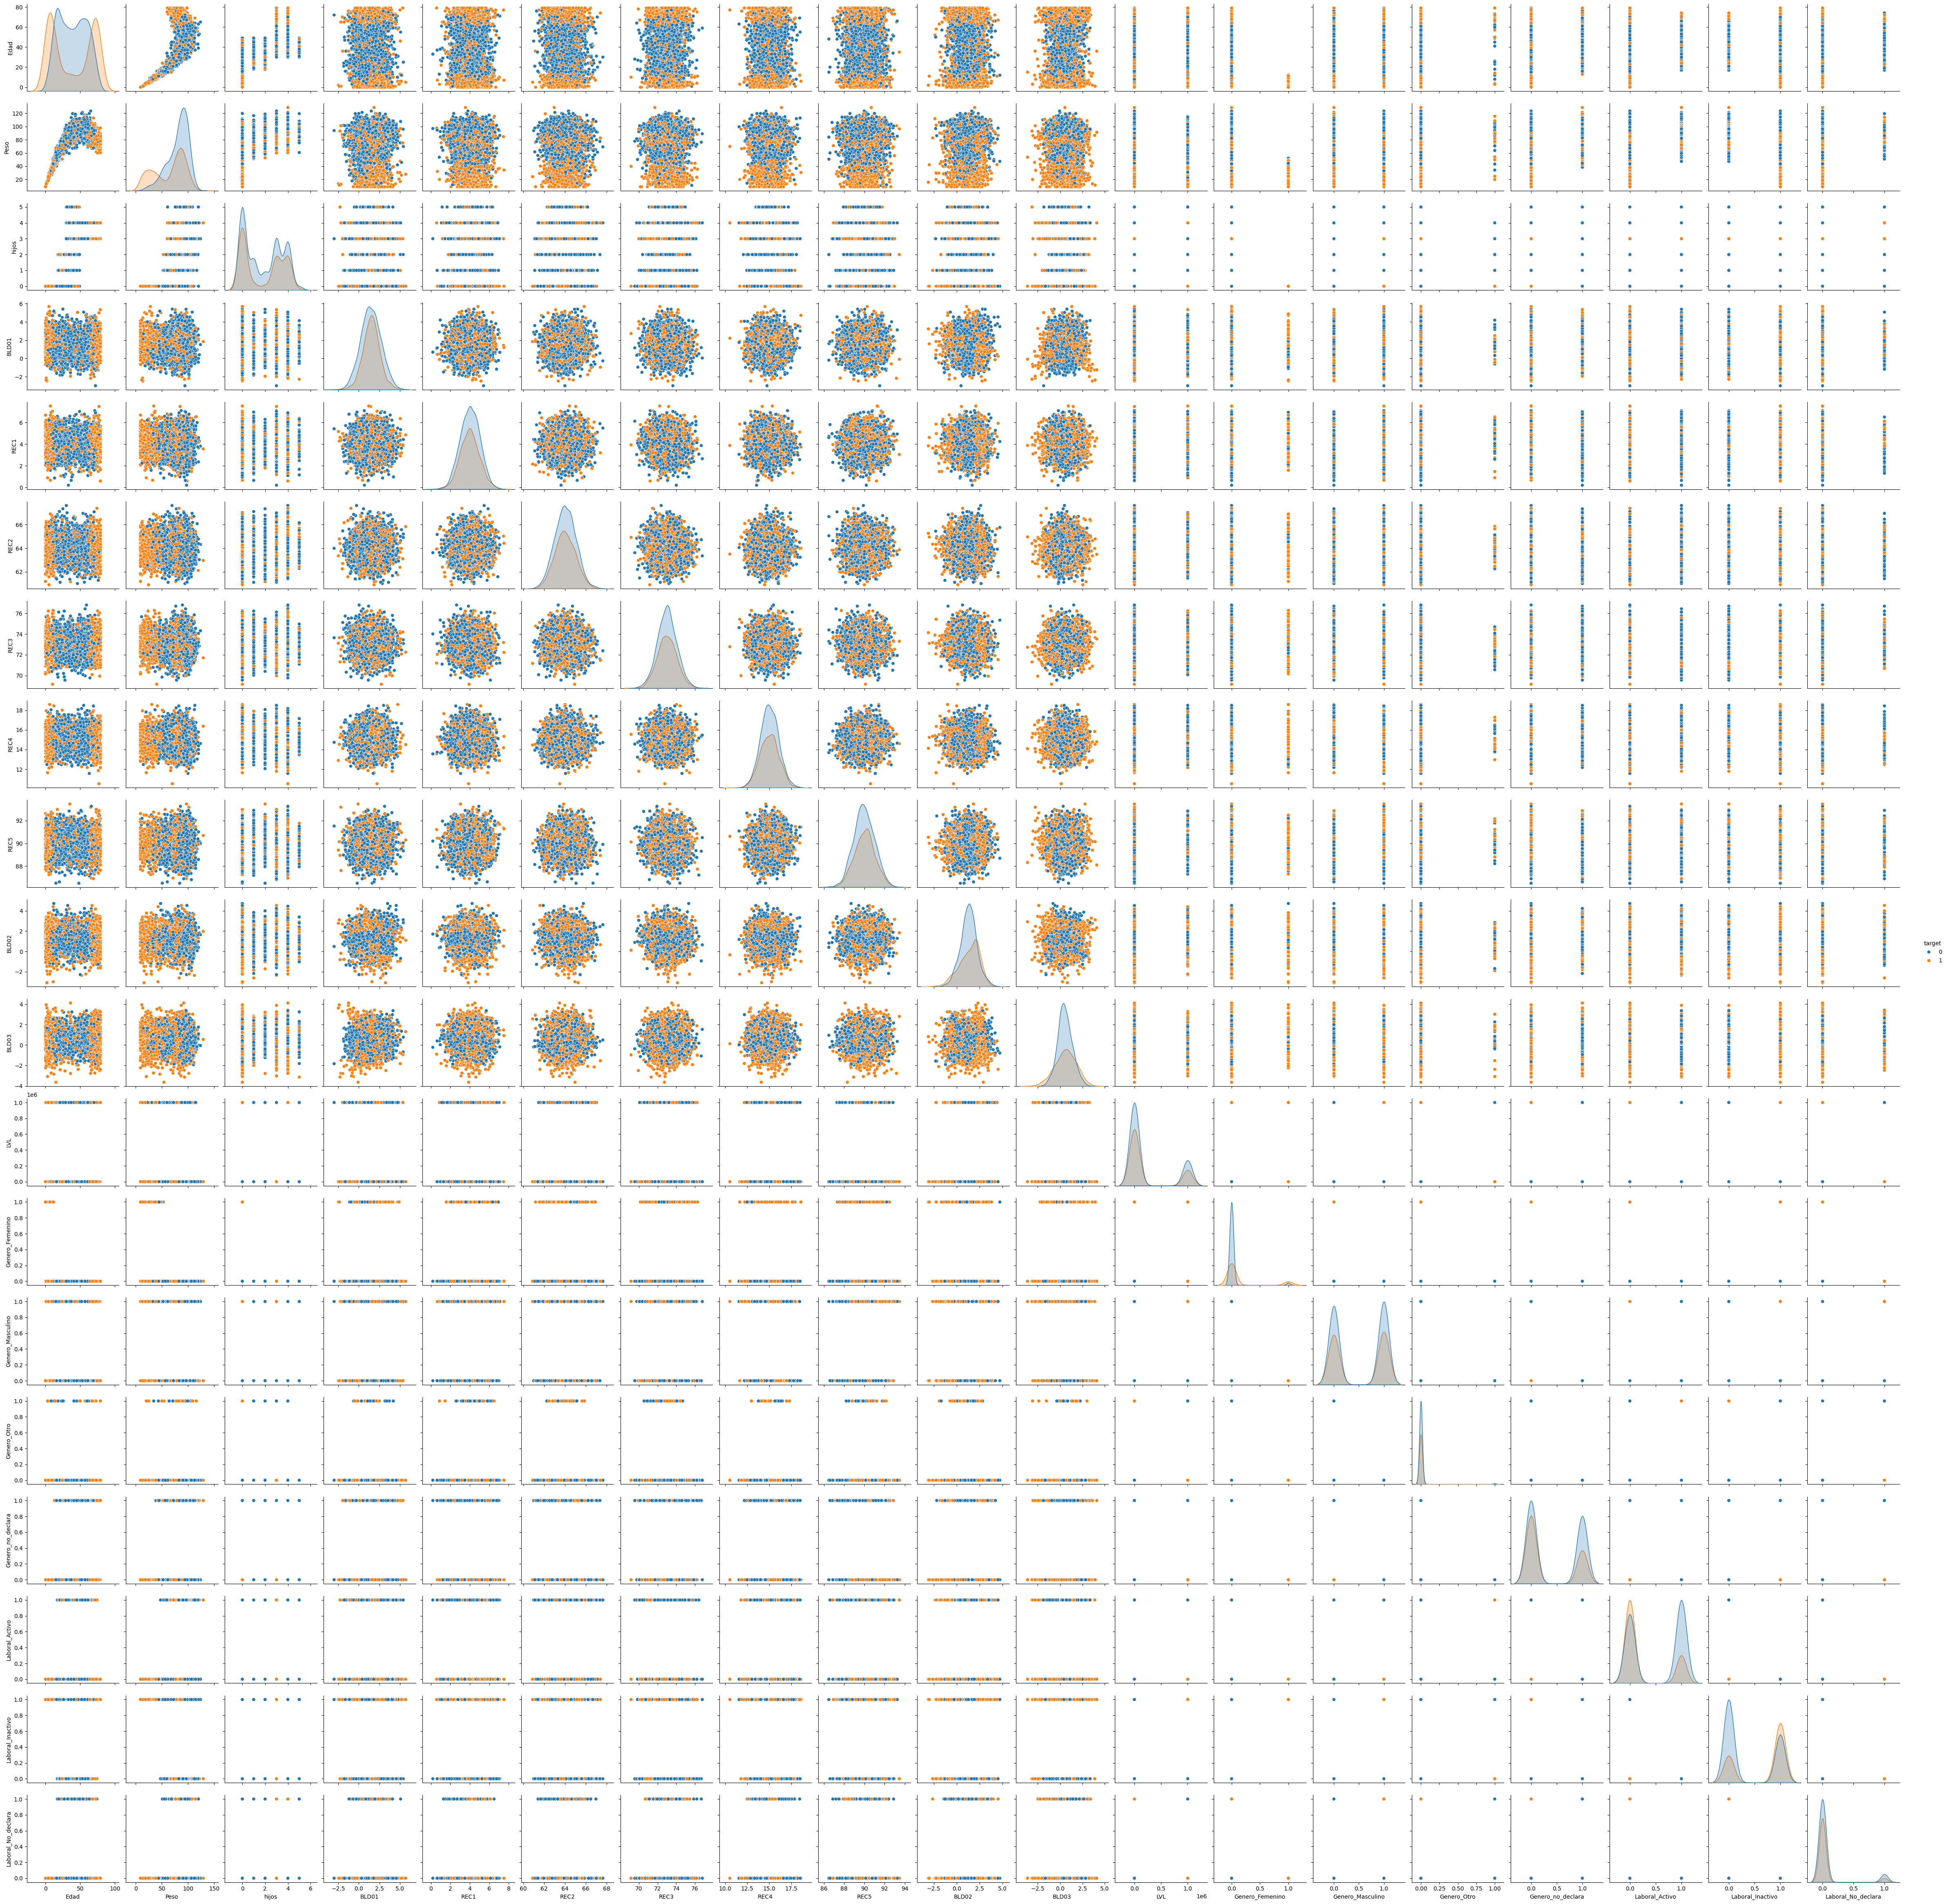

In [ ]:
sns.pairplot(df, hue='target')
plt.show()
#Naranja -> enfermo

In [ ]:

# Verificar si hay filas duplicadas
duplicated_rows = df.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

if num_duplicated_rows > 0:
    print(f"\nSe encontraron {num_duplicated_rows} filas duplicadas en el DataFrame.")

else:
    print("\nNo se encontraron filas duplicadas en el DataFrame.")




No se encontraron filas duplicadas en el DataFrame.


In [ ]:

# Asegurarse de que la columna 'BLD03' exista y sea numérica
if 'BLD03' in df.columns:
    # Convertir 'BLD03' a tipo numérico si aún no lo es
    df['BLD03'] = pd.to_numeric(df['BLD03'], errors='coerce')

    # Eliminar filas donde 'BLD03' es NaN después de la conversión (opcional, dependiendo de cómo quieras manejar los valores no numéricos)
    df.dropna(subset=['BLD03'], inplace=True)

    # Definir el número de bins
    num_bins = 10

    # Crear los bins para la variable BLD03
    df['BLD03_bins'], bin_edges = pd.cut(df['BLD03'], bins=num_bins, retbins=True, labels=False)

    # Crear un DataFrame para resumir los bins
    bin_summary = pd.DataFrame({
        'Bin': range(num_bins),
        'Min_BLD03': bin_edges[:-1],
        'Max_BLD03': bin_edges[1:],
    })

    # Agrupar por los bins creados y la variable target
    bin_counts = df.groupby(['BLD03_bins', 'target']).size().unstack(fill_value=0)

    # Renombrar las columnas de target para mayor claridad
    bin_counts.columns = ['Target_0_Count', 'Target_1_Count']

    # Unir el resumen de bins con los conteos de target
    bin_summary = bin_summary.merge(bin_counts, left_on='Bin', right_index=True, how='left').fillna(0)

    # Asegurarse de que los conteos sean enteros
    bin_summary[['Target_0_Count', 'Target_1_Count']] = bin_summary[['Target_0_Count', 'Target_1_Count']].astype(int)

    # Mostrar el resumen de los bins
    print("\nResumen de los Bins de BLD03 y Conteo de Target:")
    print(bin_summary)

else:
    print("La columna 'BLD03' no se encontró en el DataFrame.")


Resumen de los Bins de BLD03 y Conteo de Target:
   Bin  Min_BLD03  Max_BLD03  Target_0_Count  Target_1_Count
0    0  -3.635010  -2.854009               0               4
1    1  -2.854009  -2.080740               0              22
2    2  -2.080740  -1.307472              29              81
3    3  -1.307472  -0.534203             170             192
4    4  -0.534203   0.239066             699             329
5    5   0.239066   1.012334             911             432
6    6   1.012334   1.785603             490             354
7    7   1.785603   2.558871             165             219
8    8   2.558871   3.332140              28              65
9    9   3.332140   4.105409               1               9


# PROCESAMIENTO FINAL


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer  # Necesario importar ANTES de IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Configuración
# Leemos el dataset de entrenamiento
df_train = dff
df = df_train.copy()  # Trabajamos con una copia

# Mostrar información del dataset original
print("\nColumnas en el dataset original:")
print(df.columns.tolist())
print("\nPrimeras 5 filas del dataset original:")
print(df.head())
print("\nInformación del dataset original:")
print(df.info())

# 1. Preparar datos para la imputación KNN
# Convertir 'Laboral' a numérico usando LabelEncoder
label_encoder = LabelEncoder()

# Crear un imputador KNN solo para LVL
lvl_imputer = KNNImputer(n_neighbors=5)
# Usamos edad y peso para mejorar la imputación
df['LVL'] = lvl_imputer.fit_transform(df[['LVL', 'Edad', 'Peso']])[:, 0]


# Ahora categorizamos LVL en ALTO/BAJO
def categorize_lvl(x):
    return 'ALTO' if x > 500000 else 'BAJO'

df['LVL_CAT'] = df['LVL'].apply(categorize_lvl)
df = df.drop('LVL', axis=1)  # Eliminamos la columna original LVL

# Eliminar columna Genero
df = df.drop('Genero', axis=1)

# Identificar columnas para el pipeline
numeric_features = ['Edad']
categorical_features = ['Laboral', 'LVL_CAT']

# Obtener las demás columnas que no vamos a transformar
# Excluimos 'target' y las columnas que ya estamos procesando
other_features = [col for col in df.columns if col not in
                 numeric_features + categorical_features + ['target']]

print("\nColumnas que se procesarán específicamente:")
print("Numéricas:", numeric_features)
print("Categóricas:", categorical_features)
print("\nColumnas que se mantendrán sin transformar:", other_features)

# Para edad: Usamos IterativeImputer (también conocido como MICE)
age_imputer = IterativeImputer(
    max_iter=5,
    random_state=42,
    initial_strategy='mean'
)

# Transformadores
numeric_transformer = Pipeline([
    ('imputer', age_imputer)
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Crear el preprocesador combinado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass', 'passthrough', other_features)  # Mantener las demás columnas sin transformar
    ])

# Antes de la transformación final, mostremos todas las categorías
print("\nCategorías originales en cada variable categórica:")
X_temp = df.drop("target", axis=1).copy()
for feature in categorical_features:
    print(f"\nCategorías únicas en {feature}:")
    print(X_temp[feature].unique())

# Mostrar cómo queda el dataset después del preprocesamiento
print("\nMostrando las primeras filas del dataset después del preprocesamiento:")
# Aplicar solo el preprocesador
X_transformed = preprocessor.fit_transform(df)

# Obtener los nombres de las columnas después del preprocesamiento
feature_names = (
    numeric_features +  # Columnas numéricas se mantienen igual
    [f"{feature}_{val}" for feature, vals in
     zip(categorical_features,
         preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_)
     for val in vals[1:]] +  # Excluimos la primera categoría por drop='first'
    other_features  # Añadimos las columnas sin transformar
)

# Convertir a DataFrame para mejor visualización
X_transformed_df = pd.DataFrame(
    X_transformed,
    columns=feature_names
)
print("\nPrimeras 5 filas del dataset transformado:")
print(X_transformed_df.head())
print("\nForma del dataset transformado:", X_transformed_df.shape)

# Preparar datos
X = df.drop("target", axis=1)
y = df["target"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline base con KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Definir los parámetros para la búsqueda
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],  # Diferentes valores de k vecinos
    'classifier__weights': ['uniform', 'distance'],  # Probar diferentes pesos
    'classifier__metric': ['euclidean', 'manhattan'],  # Diferentes métricas de distancia
    'classifier__p': [1, 2]  # 1 para manhattan, 2 para euclidean (cuando metric='minkowski')
}

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross validation
    scoring='f1_weighted',  # Métrica para optimizar
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1  # Mostrar progreso
)

# Entrenar el modelo con búsqueda de hiperparámetros
print("\nIniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor puntaje en la validación cruzada:", grid_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred = grid_search.predict(X_test)
print("\nInforme de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Evaluar overfitting comparando rendimiento en train vs test
print("\n=== Análisis de Overfitting ===")
# Métricas en conjunto de entrenamiento
y_train_pred = grid_search.predict(X_train)
train_score = grid_search.score(X_train, y_train)
# Métricas en conjunto de test
test_score = grid_search.score(X_test, y_test)


# Diferencia entre train y test
print(f"\nDiferencia entre train y test: {train_score - test_score:.4f}")
print("(Una diferencia grande (>0.1) podría indicar overfitting)")

# Mostrar scores de CV para ver la variabilidad
cv_scores = grid_search.cv_results_['split0_test_score'], \
           grid_search.cv_results_['split1_test_score'], \
           grid_search.cv_results_['split2_test_score'], \
           grid_search.cv_results_['split3_test_score'], \
           grid_search.cv_results_['split4_test_score']

print("\nPuntajes en cada fold de CV para el mejor modelo:")
print(f"Media: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
print("(Una desviación estándar grande podría indicar inestabilidad en el modelo)")